In [12]:
import requests
from bs4 import BeautifulSoup as bs
import re
from stop_words import get_stop_words
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
lien = "https://news.google.com/topstories?hl=fr&gl=FR&ceid=FR%3Afr"

In [14]:
page_response = requests.get(lien)
soupe = bs(page_response.content, "html.parser")

In [15]:
blocs = soupe.find_all("article", {"jscontroller": "mhFxVb"})
len(blocs)

170

In [16]:
titres = []
compteur = 0
for bloc in blocs:
    compteur += 1
    titre = bloc.find("a", {"class": "DY5T1d"}).text
    titres.append(titre)
    
    auteur = bloc.find("a", {"class": "wEwyrc AVN2gc uQIVzc Sksgp"}).text
    
    temps = bloc.find("time")
    if temps:
        temps = temps["datetime"][:-1]
        temps = temps.replace("T", " ").split()
        date = temps[0]
        heure = temps[1]
    else:
        date = "--"
        heure = "--"
    
    texte = bloc.find("span", {"class": "xBbh9"})
    
    lien_article = bloc.find("a", {"class": "DY5T1d"})["href"][1:]
    lien_article = "https://news.google.com" + lien_article
    
    
    print("article n°", compteur)
    print(titre)
    print("Par", auteur)
    print("Publié le:", date, "à", heure)
    if texte:
        print("------------")
        print("Extrait :")
        print(texte.text)
    print("------------")
    print("Lien :")
    print(lien_article)
    print("================================================================================================")

article n° 1
8-Mai: pourquoi Nicolas Sarkozy et François Hollande sont présents à la cérémonie parisienne
Par BFMTV
Publié le: 2020-05-08 à 09:32:52
------------
Extrait :
Ce 8 mai, la cérémonie de commémoration est maintenue de manière particulière: sans public, en comité restreint. Les anciens présidents Nicolas Sarkozy et ...
------------
Lien :
https://news.google.com/articles/CAIiEB2L1CKlkg3bc-Byk80HeDwqGQgEKhAIACoHCAowk_2UCzCI0qoDMIjgxwY?hl=fr&gl=FR&ceid=FR%3Afr
article n° 2
EN DIRECT. Coronavirus : un 8 Mai sans public pour Emmanuel Macron - LePoint
Par Le Point
Publié le: 2020-05-08 à 05:27:00
------------
Extrait :
Aux côtés de François Hollande et Nicolas Sarkozy, notamment, le chef de l'État s'est rendu sous l'Arc de Triomphe, à Paris, vendredi.
------------
Lien :
https://news.google.com/articles/CBMieWh0dHBzOi8vd3d3LmxlcG9pbnQuZnIvc2FudGUvZW4tZGlyZWN0LWNvcm9uYXZpcnVzLWxlLWJpbGFuLWF1eC1ldGF0cy11bmlzLWRlcGFzc2UtNzUtMDAwLW1vcnRzLTA4LTA1LTIwMjAtMjM3NDY1NF80MC5waHDSAQA?hl=fr&gl

#### Problèmes :
- Limité et filtré par Google (non exhaustif)
- Comment récupérer les liens ??

In [17]:
def nettoyage(x):
    x = x.lower()
    x = re.sub(r"\W", " ", x) # Enleve la ponctuation
    x = re.sub(r"[éèêë]", "e", x)
    x = re.sub(r"[àâäà]", "a", x)
    x = re.sub(r"[ùûü]", "u", x)
    x = re.sub(r"[ôöò]", "o", x)
    x = re.sub(r"  +", " ", x)
    return x

In [18]:
titres_modif = list(map(nettoyage, titres))
titres_modif

['8 mai pourquoi nicolas sarkozy et françois hollande sont presents a la ceremonie parisienne',
 'en direct coronavirus un 8 mai sans public pour emmanuel macron lepoint',
 '8 mai macron avec sarkozy et hollande a l arc de triomphe pour une ceremonie inedite',
 'une ceremonie du 8 mai en format restreint pour emmanuel macron en raison de la pandemie',
 'nicolas sarkozy quitte le cap negre pour emmanuel macron',
 'sante si vous avez le coronavirus voici la marche a suivre apres le 11 mai',
 'en contact avec un malade apres le deconfinement voici ce qui vous arrivera',
 'coronavirus appel test isolement les 7 etapes cles a suivre quand on ressent les premiers symptomes',
 'deconfinement cinq questions sur l isolement des personnes testees positives au covid 19 et leur entourage',
 'coronavirus en cas de symptomes un parcours bien precis',
 'coronavirus en direct l europe en pleine pandemie celebre les 75 ans de la fin de la guerre',
 '8 mai 75e anniversaire de la fin de la seconde guerre

In [19]:
french_stop_words = get_stop_words('french')

In [20]:
titres_modif = " ".join(titres_modif)

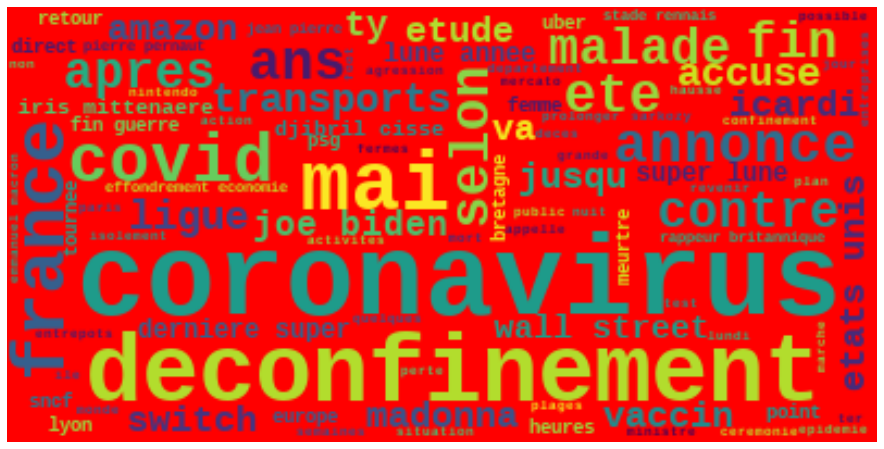

In [21]:
text = titres_modif

wordcloud = WordCloud(font_path="/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf",
                      stopwords=french_stop_words,
                      background_color="red",
                      min_word_length=0,
                      min_font_size=4)
wordcloud.generate(text)

plt.figure(figsize=(18,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Tests

In [11]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("cats"))
print(lemmatizer.lemmatize("cacti"))
print(lemmatizer.lemmatize("geese"))
print(lemmatizer.lemmatize("rocks"))
print(lemmatizer.lemmatize("python"))
print(lemmatizer.lemmatize("better", pos="a"))
print(lemmatizer.lemmatize("best", pos="a"))
print(lemmatizer.lemmatize("run"))
print(lemmatizer.lemmatize("run",'v'))

cat
cactus
goose
rock
python
good
best
run
run


In [36]:
import fr_core_news_sm
nlp = fr_core_news_sm.load()
nlp

In [34]:
import spacy
nlp = spacy.load('fr_core_news_md')

doc = nlp(u"voudrais non animaux yeux dors couvre.")
for token in doc:
    print(token, token.lemma_)

OSError: [E050] Can't find model 'fr_core_news_md'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.